# **Hyperparameters and Model Validation**
This part of jupyter notebook deals with model validations and hyper parameter optimization which includes how we can use these features to improve our model and make a better accurate hypothesis. 

# Thinking about Model Validation 
In this priciple we are going to test validity of model that is after selecting hyper params how we can split data and what accuracy can be achived after using this model.
Model validation is also important as it not only determines accuracy score but also detemines and help us solve **Bias-Variance Delima**, Which can be really usefull in better tuning of model   

## Model Validation: wrong way 
On contrary we are we just convert our data into matrix and then apply `fit()` method on whole data and then again use *features* matrix **x** to predict our outcomes which is considered as cheating in terms of Machine Learning which i.e. we are using same data which is used to learn by our model.

In [1]:
# loding iris data set from scikit-learn 
from sklearn.datasets import load_iris

# assigining iris data into iris variable
iris = load_iris()

# storing features in X
X = iris.data

# storing targets in y 
y = iris.target

In [2]:
# loading Knearestneighbor model form sklearn 
from sklearn.neighbors import KNeighborsClassifier

# creating a model of KNN with 1 neighbors 
model = KNeighborsClassifier(n_neighbors=1)

# fiting our model with data 
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [3]:
# importing accuracy function 
from sklearn.metrics import accuracy_score

# predicting values of data features
y_model = model.predict(X)

# determining accuracy of our model
accuracy_score(y,y_model)

1.0

>**Note**: We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model! But is this truly measuring the expected accuracy?Have we really come upon a model that we expect to be correct 100% of the time?

>As you may have gathered, the answer is no. In fact, this approach contains a fundamental flaw: it trains and evaluates the model on the same data. Furthermore, the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

## Model validation the right way: Holdout sets
So what can be done? A better sense of a model's performance can be found using what's known as a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility in Scikit-Learn:

In [4]:
# importing train and test split data 
from sklearn.model_selection import train_test_split

# breaking data into train and test data 
X1,X2,y1,y2 = train_test_split(X,y)

# fitting data on one set of data 
model.fit(X1,y1)

# evaluate model values 
y_model = model.predict(X2)

# determining accuracy 
accuracy_score(y2, y_model)

0.8947368421052632

## Model validation via cross-validation
One of the most disadvantage of holdouts are that we are only able to perform training on one half of data and other half of data is left for testing which may reduce or degrade quality of our model. 

To over come this problem we can divide data into portions and then perform tests on each of the portions and tune better model with the help of this phenomena, it is commonly knows as cross validation of K-fold CV. 

In [5]:
# using second part as training data
y2_model = model.fit(X1, y1).predict(X2)

# using first portion of data as training data  
y1_model = model.fit(X2, y2).predict(X1)

# computing accuracy of both models
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)

(0.9464285714285714, 0.8947368421052632)

Instead of doing this process mannualy we can use predifiened method of scikit-learn `cross_val_score` to perform this task:

In [6]:
# importing cross_val_score method
from sklearn.cross_validation import cross_val_score

# using different combinations to calculate model accuracy using cross_validation
cross_val_score(model, X, y, cv=5) # 5 differnt scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross validation, and can be used as follows:

In [7]:
# importing leaveoneout from cross validation 
from sklearn.cross_validation import LeaveOneOut

# getting scores of leave one out 
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))

# printing scores 
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

> * 1.0 denotes Sucessful 
> * 0.0 denotes Unsucessful

In [8]:
# mean of score 
scores.mean()

0.96

# Selecting the Best Model

Now that we have seen how our validation and cross validation works, lets get deep dive into how we can tune hyper parameters and create a better model.

*if our estimator is underperforming, how should we move forward?* There are several possible answers:
* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample



## Bias-Variance trade off

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance.

There is always a problem if we should leave some data or not or should we just use all of the data to train our model, leading towards underfitting and overfitting respectively. To overcome this problem we are there to find a sweet spot i.e. we are there to tune our model just enough that it is between both the end points and adequate to predict and adapt new chages in or model. 

## Validation curves in Scikit-Learn

Let's look at an example of using cross-validation to compute the validation curve for a class of models. Here we will use a polynomial regression model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter. For example, a degree-1 polynomial fits a straight line to the data; for model parameters **a and b**:
<center>**y=ax+b**</center>

A degree-3 polynomial fits a cubic curve to the data; for model parameters **a,b,c,d**:
<center>** y = ax^3 + bx^2 + cx + d**</center>

In [9]:
# importing polynomial features 
from sklearn.preprocessing import PolynomialFeatures

# imprting liner regression 
from sklearn.linear_model import LinearRegression

# importing pipeline 
from sklearn.pipeline import make_pipeline

# function to define polynomial regression 
def PolynomialRegression(degree = 2, **kwargs):
    # returning a pipeline
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [10]:
# import numpy for matrix maths 
import numpy as np

# function to genreate data 
def make_data(N, err= 1.0, rseed = 1 ):
    # randomly sample data 
    rng = np.random.RandomState(rseed)
    
    # X data features 
    X = rng.randn(N,1) ** 2
    
    # y target data 
    y = 10 - 1.0 / (X.ravel() + 0.1)
    
    if err > 0:
        y+= err * rng.randn(N)
    return X,y

# making a data 
X,y = make_data(40)

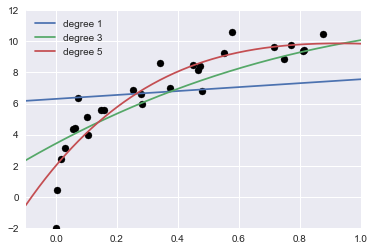

In [11]:
# data visualization 
%matplotlib inline
# graph library
import matplotlib.pyplot as plt 

# plot formatting 
import seaborn as sns; sns.set()

# creating a testing data 
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# plot X,y points 
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

# for different degrees
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree {}'.format(degree))
# defining X limit
plt.xlim(-0.1, 1.0)
# defining y limit
plt.ylim(-2, 12)
plt.legend(loc = 'best')

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the `validation_curve` convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


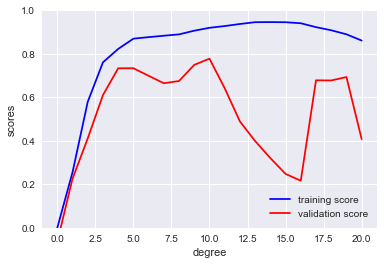

In [12]:
# importing validation curve 
from sklearn.learning_curve import validation_curve

# degrees 
degree = np.arange(0,21)

# applying validation curve 
train_score, val_score = validation_curve(PolynomialRegression(), X,y, 'polynomialfeatures__degree', degree, cv=7)

# plotting train score
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')

# plotting validation score
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('scores');

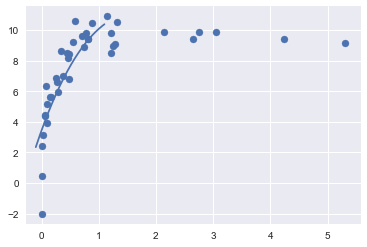

In [13]:
# read variance curve 

plt.scatter(X.ravel(), y)
# define x lim
lim = plt.axis()
# find y_test
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)

# plotting the graph
plt.plot(X_test.ravel(), y_test);

#plotting limit
plt.axis(lim);

# Learning Curve 

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data. For example, let's generate a new dataset with a factor of five more points:

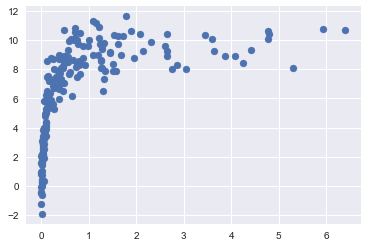

In [14]:
# generate data set of 200 points 
X2,y2 = make_data(200)

# ploting scatter plot of above genereated data 
plt.scatter(X2.ravel(),y2);

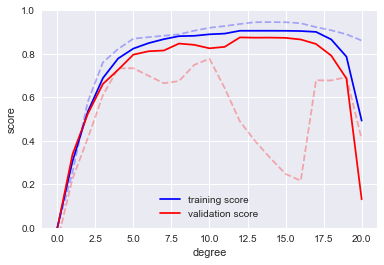

In [15]:
# define degree
degree = np.arange(21)

# compute validation curve
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

#plotting train_score 2  
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')

#plotting val score 2
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')

#plotting train score
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')

#plotting val score
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

>Thus we see that the behavior of the validation curve has not one but two important inputs: the model complexity and the number of training points. It is often useful to to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this:
* A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
* A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
* A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

# Validation in Practice: Grid Search

Scikit-Learn provides automated tools to do this in the grid search module. Here is an example of using grid search to find the optimal polynomial model. We will explore a three-dimensional grid of model features; namely the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem. This can be set up using Scikit-Learn's `GridSearchCV` meta-estimator:

In [16]:
# importing grid serach 
from sklearn.grid_search import GridSearchCV

# param grids 
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

# creating an instance of grid search cv  
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [17]:
# fitting data into grid 
grid.fit(X,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [18]:
# time to reveal and ask best parameters 
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 0}

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


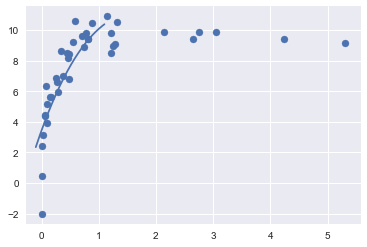

In [19]:
# getting best estimator 
model = grid.best_estimator_

# plotting a scatter 
plt.scatter(X.ravel(),y)

# getting lims
lim = plt.axis()

# predicting the value
plt.plot(X_test.ravel(), y_test, hold=True);

# applyings limits 
plt.axis(lim);